In [1]:
#import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A.I

In [2]:
# Step 1: Data acquisition

df: pd.DataFrame = pd.read_excel('Data Take Home Assignment 1 Exercise A.xlsx')
df = df.iloc[142:162]
df

,X,Y
142,23.77,445.72
143,14.43,466.58
144,28.25,436.99
145,12.26,470.87
146,14.55,457.77
147,24.57,448.15
148,10.25,476.03
149,21.96,442.87
150,9.82,477.93
151,18.58,459.06


In [3]:
# Step 2: Data transformation using Min-Max normalization
# info: https://www.geeksforgeeks.org/data-normalization-in-data-mining/

def normalize(df):
    for c in df.columns: 
        df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())
    return df
df = normalize(df)
df

,X,Y
142,0.727098,0.224976
143,0.279137,0.726901
144,0.941966,0.014918
145,0.175060,0.830125
146,0.284892,0.514918
147,0.765468,0.283446
148,0.078657,0.954283
149,0.640288,0.156400
150,0.058034,1.000000
151,0.478177,0.545958


-0.9329765967793675 0.9415758227757707


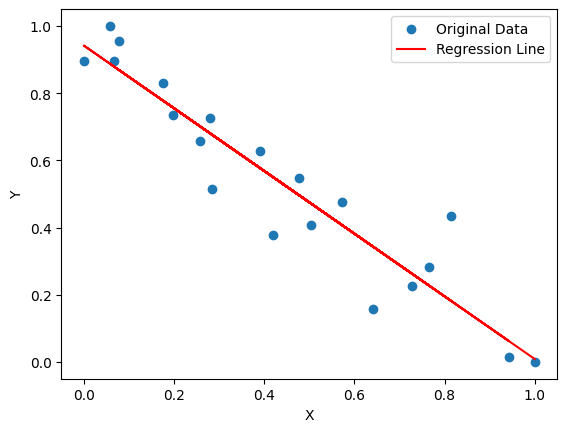

In [4]:
# Step 3: Least Squares

def least_squares(x, y):
    """Given the X and Y parameters of a data set, will return a regression line.
    The regression line is calculated with the formula `Y = m*x + b` where:
        - `Y` is the the predicted parameters,
        - `m` is the slope coefficient,
        - `b` is the y-intercept, 
        - `x` is the input data.
    
    Args:
        - `x`: original x data
        - `y`: original y data
        
    Returns:
        - `y_prediction`: regression line
    """
    n = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_squared_sum = np.sum(x**2)

    m = (n * xy_sum - x_sum*y_sum) / (n*x_squared_sum - x_sum**2) # slope coefficient
    b = (y_sum - m*x_sum) / n # y-intercept

    y_prediction = m*x + b 
    print(m, b)
    return y_prediction

y_prediction = least_squares(df.X, df.Y)

# plot original data against regression line
plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, y_prediction, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
# Step 4: Cost Function using Mean Squared Error (MSE)

def cost_function(theta, x, y):
    """Implementation of the Mean Squared Error (MSE) cost function.

    Will predict a set of y values, and calculate the cost between.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data
        
    Returns:
        - MSE
    """
    cost = 0
    for i in range(len(x)):
        h_xi = theta[0] + theta[1] * x[i]
        cost = (h_xi - y[i])**2
    return cost*1/(2*len(x))

def get_gradient(theta, x, y):
    """Gradient for given data.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data

    Returns:
        - theta_gradient: partial derivates with respect to theta
    """
    theta_gradient = np.zeros(2)
    for i in range(len(x)):
        theta_gradient[0] += (theta[1]*x[i] + theta[0])- y[i]
        theta_gradient[1] += ((theta[1]*x[i] + theta[0])- y[i])*x[i]
    return theta_gradient*1/len(x)
    
theta = np.zeros(2,)
theta[0] = np.random.random()
theta[1] = np.random.random()
cost = cost_function(theta, np.array(df.X), np.array(df.Y))
theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))
print(theta, cost, theta_gradient)
theta = 0.1 * theta_gradient
theta

[0.4093966  0.53506684] 0.02230027966585615 [0.10291679 0.17523697]


array([0.01029168, 0.0175237 ])

initial model parameters [0.18898753 0.21090519]
gradients: [-0.25772913 -0.00964663]
model parameters: [0.21476044 0.21186985]


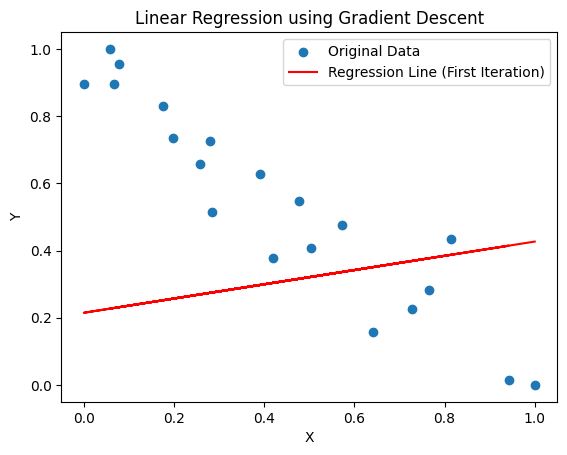

In [6]:
# Step 5 Gradient Descent first iteration

theta = np.zeros(2)
theta[0] = np.random.random()
theta[1] = np.random.random()
print("initial model parameters", theta)
learning_rate = 0.1
iterations = 1000
costs = []

cost = cost_function(theta, np.array(df.X), np.array(df.Y))
costs.append(cost)

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (First Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradients: [-0.23153889  0.00176952]
model parameters: [0.23791433 0.2116929 ]


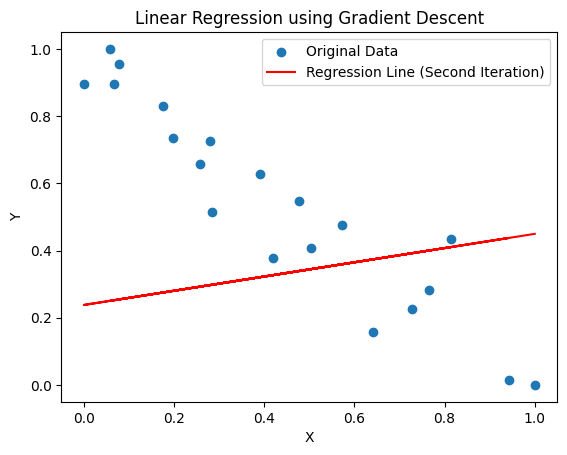

In [7]:
# Step 6 Gradient Descent - second iteration

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Second Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradients: [-0.20846155  0.01173734]
model parameters: [0.25876048 0.21051916]


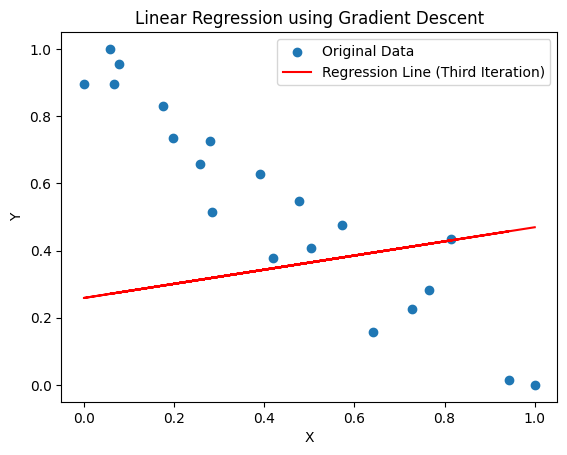

In [8]:
# Step 7 Gradient Descent - third iteration

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Third Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradients: [-2.47180892e-05  5.29045921e-05]
model parameters after 1000 iterations: [ 0.94124457 -0.93226762]
last cost: 2.015908282438545e-06


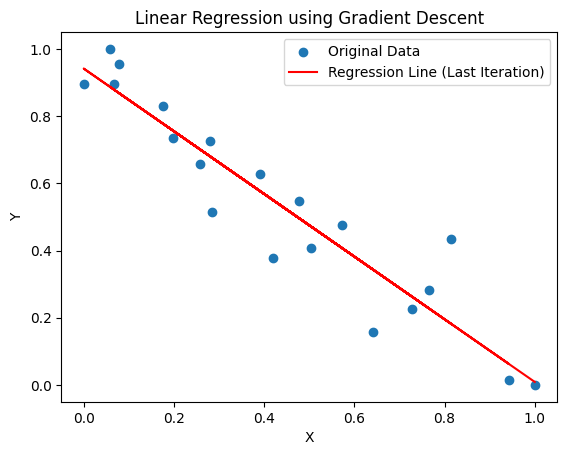

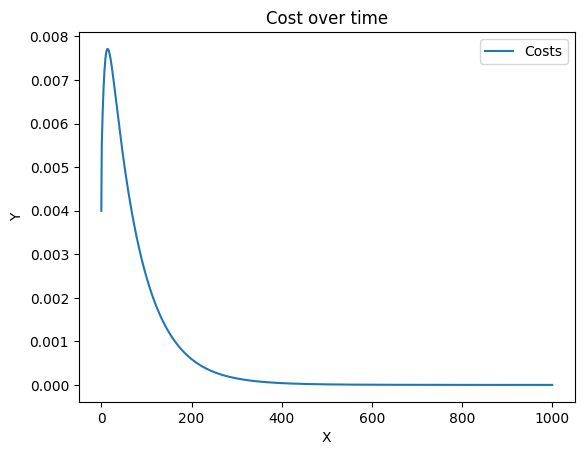

In [9]:
# Step 8 Gradient Descent - final iteration

for i in range(iterations):
    cost = cost_function(theta, np.array(df.X), np.array(df.Y))
    costs.append(cost)

    # Calculate the gradients with respect to m and b
    theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

    # Update the model parameters
    theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print(f"model parameters after {iterations} iterations:", theta)
print('last cost:', costs[-1])

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Last Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

plt.plot(costs, label='Costs')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Cost over time')
plt.show()

# Discussion LS vs GD

Least Squares (LS) is a method that calculates the optimal coefficients for a linear model in a single step, relying on mathematical formulas. On the other hand, Linear Regression with Gradient Descent (GD) is an iterative optimization technique that gradually optimizes the coefficients through multiple steps, adjusting them to minimize the error. While LS provides a solution in one step, it can be computationally expensive when dealing with large or high-dimensional datasets due to matrix operations. In contrast, GD is more efficient when working with larger and high-dimensional datasets, as it processes data point by point or in mini-batches, making it scalable and memory-efficient.

LS is known for its simplicity, as it does not require fine-tuning hyper-parameters. It derives a direct solution from the data. In contrast, GD requires parameter tuning, such as including the selection of the learning rate and the number of iterations. These choices can significantly impact the algorithm's performance.

# A.II

In [10]:
# Step 1 - Partial derivates & cost function

def cost_function(theta, x, y):
    """Implementation of the formula given in the assignment.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data
        
    Returns:
        - cost
    """
    cost = 0
    for i in range(len(x)):
        h_xi = theta[0] + theta[1]*x[i] + theta[2]*x[i]**2
        cost += (y[i] - h_xi)**4
    return cost*1/(len(x)*4)


def get_gradient(theta, x, y):
    """Gradient for given data.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data

    Returns:
        - theta_gradient: partial derivates with respect to theta
    """
    theta_gradient = np.zeros(3)
    for i in range(len(x)):
        hx_i = theta[0] + theta[1]*x[i] + theta[2]*x[i]**2
        error = (y[i] - hx_i)**3
        theta_gradient[0] += error
        theta_gradient[1] += error*x[i]
        theta_gradient[2] += error*x[i]**2
    return theta_gradient*(-1/len(x))

theta = np.zeros(3)
theta[0] = np.random.random()
theta[1] = np.random.random()
theta[2] = np.random.random()
cost = cost_function(theta, np.array(df.X), np.array(df.Y))
theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))
print(theta, cost, theta_gradient)
theta = 0.1 * theta_gradient
theta

[0.99810622 0.32950388 0.45366076] 0.3666005576798976 [1.03043367 0.84111394 0.72426852]


array([0.10304337, 0.08411139, 0.07242685])

initial model parameters [0.9253427  0.92961598 0.51871845]
gradients: [2.38558388 1.96980612 1.70573202]
model parameters: [0.68678431 0.73263537 0.34814525]


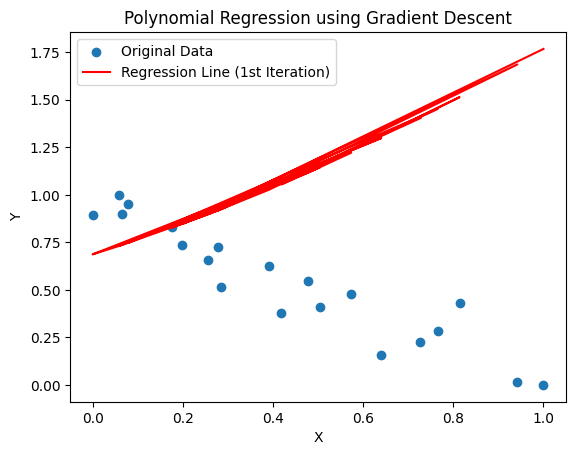

In [11]:
# Step 2 and 3 - update rule for model parameters and polynomial gradient descent first iteration

theta = np.zeros(3)
theta[0] = np.random.random()
theta[1] = np.random.random()
theta[2] = np.random.random()
print("initial model parameters", theta)
learning_rate = 0.1
iterations = 10000
costs = []

cost = cost_function(theta, np.array(df.X), np.array(df.Y))
costs.append(cost)

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[0] + theta[1]*df.X + theta[2]*(df.X**2), color='red', label='Regression Line (1st Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression using Gradient Descent')
plt.show()

gradients: [0.8796005  0.75066107 0.66292107]
model parameters: [0.59882426 0.65756927 0.28185314]


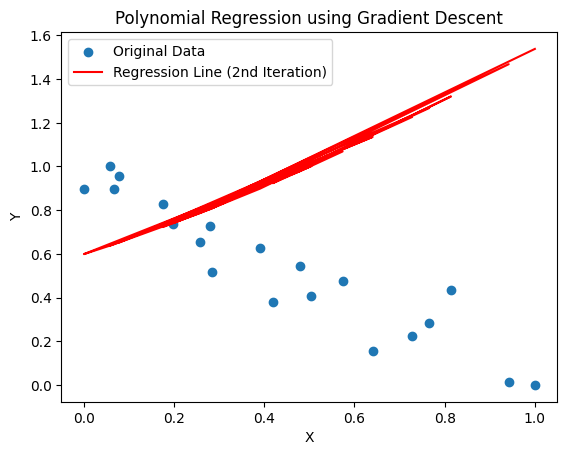

In [12]:
# Step 3 - Polynomial Gradient Descent second iteration

cost = cost_function(theta, np.array(df.X), np.array(df.Y))
costs.append(cost)

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[0] + theta[1]*df.X + theta[2]*(df.X**2), color='red', label='Regression Line (2nd Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression using Gradient Descent')
plt.show()

gradients: [0.54462175 0.47502814 0.42365527]
model parameters: [0.54436209 0.61006645 0.23948761]


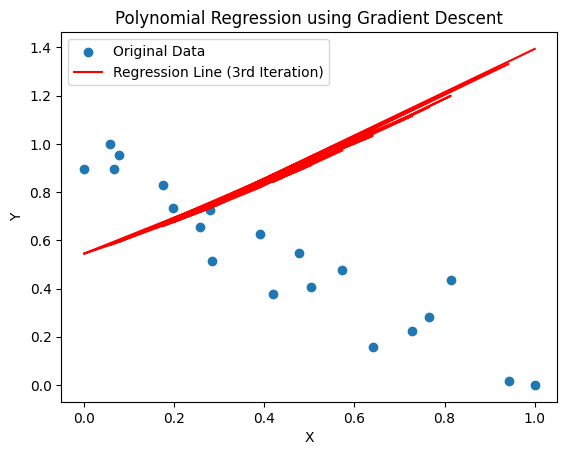

In [13]:
# Step 3 - Polynomial Gradient Descent third iteration

cost = cost_function(theta, np.array(df.X), np.array(df.Y))
costs.append(cost)

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta -= learning_rate * theta_gradient

print("gradients:", theta_gradient)
print("model parameters:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[0] + theta[1]*df.X + theta[2]*(df.X**2), color='red', label='Regression Line (3rd Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression using Gradient Descent')
plt.show()

Converged at step 3583
gradients: [-1.38378311e-04  2.73129995e-04  7.91263599e-05]
model parameters after 3583 iterations: [ 0.79211328 -0.26091381 -0.55000217]


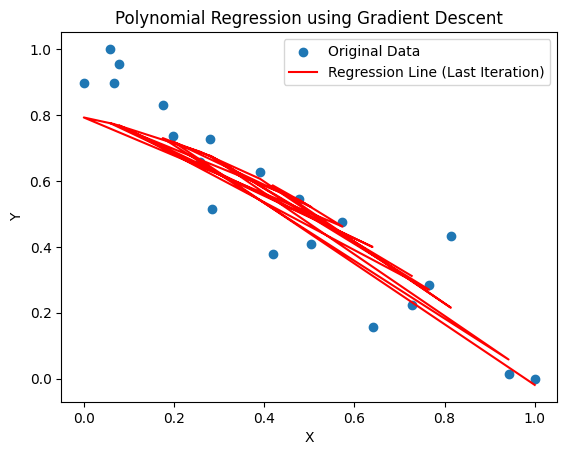

In [14]:
# Step 3 - Polynomial Gradient Descent final iteration

cost_acceptance = 1e-8
early_iter = 0
for i in range(iterations):
    cost = cost_function(theta, np.array(df.X), np.array(df.Y))
    if abs(costs[-1] - cost) < cost_acceptance:
        print("Converged at step", i)
        early_iter = i
        break
    costs.append(cost)

    theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

    theta -= learning_rate * theta_gradient


print("gradients:", theta_gradient)
print(f"model parameters after {early_iter} iterations:", theta)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[0] + theta[1]*df.X + theta[2]*(df.X**2), color='red', label='Regression Line (Last Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression using Gradient Descent')
plt.show()

# Step 4
Linear vs Polynomial Regression

Linear regression is the preferred choice for modeling straightforward, linear relationships in your data, making it suitable for scenarios where the data points follow a simple, straight-line trend; such as predicting temperature based net hourly energy output like in our example. In contrast, polynomial regression is employed when dealing with more complex, non-linear relationships, allowing for the modeling of curves and bends in the data.

While linear regression involves a simple model with just two parameters: `a` and `b`, making it easy to work with and interpret, polynomial regression can become more complex, particularly as you introduce higher-degree polynomial terms, which complicates the model by introducing more parameters to estimate.

It's important to note that linear regression is less susceptible to overfitting, while polynomial regression can be more prone to overfitting, requiring careful model selection and potential regularization techniques.

The choice between these two methods hinges on the nature of your data and the specific relationships you aim to model. Linear regression excels in simplicity and interpretability for linear relationships, while polynomial regression offers flexibility to capture more complex, non-linear data patterns.